In [1]:
from lyrics_reader import EXAMPLE_LYRIC, get_tree_segments_lines_token, get_sentences
from ssm_structure import self_similarity_matrix, draw_ssm, string_similarity
from summarization import textrank_summary, topicrank_summary, lines_fitness, lyric_thumbnail, textrank_topicrank_summary, textrank_topicrank_fitness_summary
from explicit_lyrics_detection import SWEARWORDS_DICTIONARY, predict_explicitness
from utils import headline_from

In [12]:
# parse example lyric
tree, segments, lines, token = get_tree_segments_lines_token(EXAMPLE_LYRIC)

lines[8:12]

["'cause i'm your lady",
 'and you are my man',
 'whenever you reach for me',
 "i'll do all that i can"]

[[1.         0.25       0.23364486 0.26724138 0.24074074 0.23364486
  0.24390244 0.28037383 0.20560748 0.24390244 0.30841121 0.29906542]
 [0.25       1.         0.35714286 0.21551724 0.21428571 0.35714286
  0.26829268 0.25       0.34821429 0.26829268 0.28571429 0.3125    ]
 [0.23364486 0.35714286 1.         0.31896552 0.28703704 1.
  0.27642276 0.28571429 0.92473118 0.27642276 0.25714286 0.22727273]
 [0.26724138 0.21551724 0.31896552 1.         0.20689655 0.31896552
  0.22764228 0.23275862 0.31896552 0.22764228 0.24137931 0.25      ]
 [0.24074074 0.21428571 0.28703704 0.20689655 1.         0.28703704
  0.25203252 0.25       0.26851852 0.25203252 0.22222222 0.25      ]
 [0.23364486 0.35714286 1.         0.31896552 0.28703704 1.
  0.27642276 0.28571429 0.92473118 0.27642276 0.25714286 0.22727273]
 [0.24390244 0.26829268 0.27642276 0.22764228 0.25203252 0.27642276
  1.         0.25203252 0.29268293 1.         0.70731707 0.46341463]
 [0.28037383 0.25       0.28571429 0.23275862 0.25       

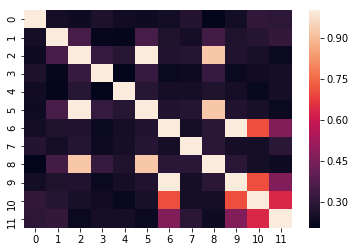

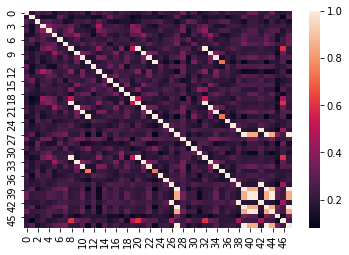

In [16]:
def showcase_structure():
    """Shows self-similarity matrices (SSM) where entry (i,j) is the similarity between elements i and j."""
    # Structure of segments
    ssm_segments = self_similarity_matrix(segments, string_similarity)
    print(ssm_segments)
    draw_ssm(ssm_segments)
    # Structure of lines
    ssm_lines = self_similarity_matrix(lines, string_similarity)
    draw_ssm(ssm_lines)

showcase_structure()

In [18]:
def showcase_summaries():
    def print_summary(method: str, lines):
        print(headline_from(method + ' summary of length ' + str(len(lines))))
        for line in lines:
            print(line)
        print()
    SUMMARY_LENGTH = 7
    print_summary(method='TextRank', lines=textrank_summary(lines, SUMMARY_LENGTH))
    print_summary(method='TopSum', lines=topicrank_summary(lines, SUMMARY_LENGTH))
    print_summary(method='TextRank + TopSum', lines=textrank_topicrank_summary(EXAMPLE_LYRIC, SUMMARY_LENGTH))
    print_summary(method='TextRank + TopSum + Lyric Thumbnail', lines=textrank_topicrank_fitness_summary(EXAMPLE_LYRIC, SUMMARY_LENGTH))

showcase_summaries()    

TextRank summary of length 7
----------------------------
'cause i'm your lady
lost is how i'm feeling
that all ends when i'm with you
'cause i am always by your side
the feeling that i can't go on
i'm gonna do all that i can
'cause i'm ready to learn

TopSum summary of length 7
--------------------------
the whispers in the morning
of lovers sleeping tight
and feel each move you make
and you are my man
lying in your arms
we're heading for something
somewhere i've never been

TextRank + TopSum summary of length 7
-------------------------------------
i hold on to your body
a love that i could not forsake
'cause i'm your lady
lost is how i'm feeling
that all ends when i'm with you
'cause i am always by your side
the feeling that i can't go on

TextRank + TopSum + Lyric Thumbnail summary of length 7
-------------------------------------------------------
as i look in your eyes
i hold on to your body
a love that i could not forsake
lost is how i'm feeling
that all ends when i'm with you
'

In [20]:
def showcase_explicitness():
    print(headline_from('Predicting explicitness of lyric based on swear word dictionary:'))
    print('Example lyric is', predict_explicitness(EXAMPLE_LYRIC))

showcase_explicitness()

Predicting explicitness of lyric based on swear word dictionary:
----------------------------------------------------------------
Example lyric is NOT explicit
